# Load the dataset

In [ ]:
# Library Connecting Google Drive to Colab to Load Data
from google.colab import drive
drive.mount('/content/gdrive') # google drive mount

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
# We can read, write, save a dataset using pandas library
# Numpy is libraries for Data processing and calculation for array or matrix.
import pandas as pd
import numpy as np

In [ ]:
filename = '/content/gdrive/My Drive/Data/tutorial.csv' # File path where the data file is located
data = pd.read_csv(filename) # Read the data file using pd.read_csv()

In [ ]:
data.head() # whether check if data is loaded.

,x,y
0,1,4
1,2,5
2,3,6
3,4,7
4,5,8


# Make a dataset and save it

In [ ]:
x_data = np.array([i for i in range(1, 21)])
x_data

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [ ]:
y_data = x_data + 3
y_data

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23])

In [ ]:
dataset = np.vstack((x_data, y_data))
dataset

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23]])

In [ ]:
dataset = np.transpose(dataset)
dataset

array([[ 1,  4],
       [ 2,  5],
       [ 3,  6],
       [ 4,  7],
       [ 5,  8],
       [ 6,  9],
       [ 7, 10],
       [ 8, 11],
       [ 9, 12],
       [10, 13],
       [11, 14],
       [12, 15],
       [13, 16],
       [14, 17],
       [15, 18],
       [16, 19],
       [17, 20],
       [18, 21],
       [19, 22],
       [20, 23]])

In [ ]:
dataset_df = pd.DataFrame(dataset) # Convert array data to DataFrame format for storage as csv files
dataset_df.to_csv('/content/gdrive/My Drive/Data/tutorial2.csv', header = ['x', 'y']) # Read the csv file using pd.to_csv()
# The file path to be saved must be inserted, and the "header" function is inserted to put the column name.

# Linear Regression

## Prepare the dataset

In [ ]:
# TensorFlow is a free and open-source software library for machine learning and artificial intelligence.
# It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.
# Keras is an open-source software library that provides a Python interface for artificial neural networks.
# Keras acts as an interface for the TensorFlow library.
import tensorflow as tf
from tensorflow.keras.models import Sequential # The Sequential model is suitable for normal layer stacks with exactly one input value and one output value for each layer.
from tensorflow.keras.layers import Flatten, Dense # Flatten and Dense are used to construct a deep learning layer.
from tensorflow.keras.optimizers import SGD # Stochastic gradient descent

In [ ]:
# Load the dataset
filename = '/content/gdrive/My Drive/Data/tutorial.csv'
data = pd.read_csv(filename)

In [ ]:
# Import x_data
x_data = np.array(data['x'][:15])
x_data

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [ ]:
# Import y_data
y_data = np.array(data['y'][:15])
y_data

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

## Create the model

In [ ]:
# There are one input and one output. The linear regression equation is y = w*x + b
model = Sequential() # Define the sequential deep learning model

model.add(Flatten(input_shape=(1,))) # Add "Flatten" layer to model with input shape 1.
model.add(Dense(1, activation = 'linear')) # Add "Dense" layer to model with "linear" activeation function. output size = 1
# In artificial neural networks, the activation function of a node defines the output of that node given an input or set of inputs.

In [ ]:
model.compile(optimizer = SGD(learning_rate=1e-2), loss = 'mse') # Compile the model. use optimizer "SGD" with learning rate 0.01 and "mse" loss fuction
model.summary() # Check the structure of the deep learning model we make

## Train the data

In [ ]:
history = model.fit(x_data, y_data, batch_size = 4, epochs= 200, verbose = 1) # Train x_data and y_data and set the number of Batch size to 4 and the number of Epochs to 200

Optimizer, Learning Rate, Loss function, Batch size, Epochs and so on are parameter.These parameters should be set by you.

## Check the result and Visualize it

In [ ]:
# This linear regression model is y=x+3, where w = 1 and b = 3
x_test = np.array([-3.1, 3.0, 3.5, 15.0, 20.1]) # Check the result with other data.
y_test = x_test + 3 # y_test is the true value.
result = model.predict(x_test) # result is the prediction value.
print(result)

1/1 [==============================] - 0s 108ms/step
[[-0.17336845]
 [ 5.935409  ]
 [ 6.4361286 ]
 [17.952677  ]
 [23.060017  ]]


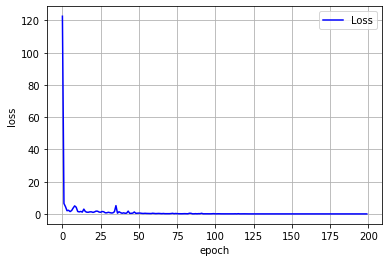

In [ ]:
import matplotlib.pyplot as plt  # library for ploting the numpy data

y_loss = history.history['loss'] # read loss data from history
x_len = np.arange(len(y_loss)) # length of the graph x-axis

plt.plot(x_len, y_loss, c='blue', label='Loss') # plot loss data (x-axis, y-axis, color, label)

plt.legend(loc='upper right') # generate legend
# generate grid and naming the x, y label
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
loss = model.evaluate(x_test, y_test) # Check the loss value between true value and prediction value.

1/1 [==============================] - 0s 188ms/step - loss: 0.0035


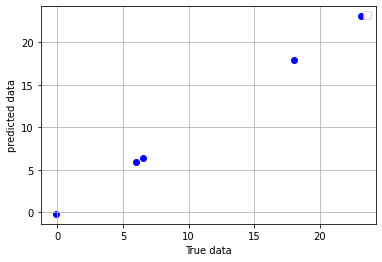

In [ ]:
# True value and prediction value are graphs that visually compare
# The closer that points on the graph are to the y=x line, the better the model is learned.
plt.scatter(y_test, result, c='blue')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('True data', color = 'white')
plt.ylabel('predicted data', color = 'white')
plt.show()